In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from netam import framework

from netam.framework import (
    SHMoofDataset,
    RSSHMBurrito,
)
from netam import models

import sys
sys.path.append("/Users/matsen/re/netam-experiments-1")
from shmex.shm_zoo import create_model, train_model
from shmex.shm_data import train_val_dfs_of_nickname

Using Metal Performance Shaders


In [2]:
train_df, val_df = train_val_dfs_of_nickname("cui")
site_count = 500

model = framework.load_crepe("/Users/matsen/re/netam-experiments-1/train/trained_models/fivemer-cui").model
burrito = RSSHMBurrito(
    SHMoofDataset(train_df[:1000], kmer_length=model.kmer_length, site_count=site_count),
    SHMoofDataset(val_df[:1], kmer_length=model.kmer_length, site_count=site_count),
    model,
    )

Loading /Users/matsen/data/cui-et-al-oof_pcp_2024-02-07_MASKED_NI.csv.gz


In [3]:
model.r_kmer_embedding.weight.data -= np.log(10.0)
burrito.optimize_branch_lengths()

Finding optimal branch lengths: 100%|██████████| 1/1 [00:00<00:00, 108.16it/s]


In [4]:
csv_path = "fivemer_modified_branch_lengths.csv"
burrito.train_loader.dataset.export_branch_lengths(csv_path)

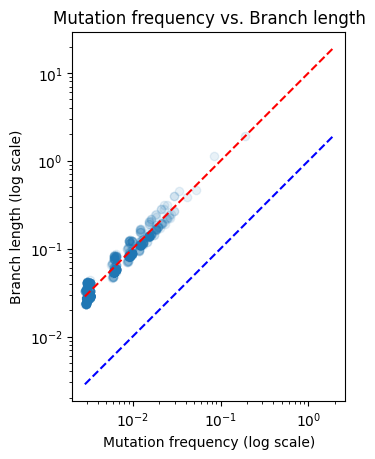

In [5]:
bl_df = pd.read_csv(csv_path)
fig, ax = plt.subplots()
scatter = ax.scatter(
    bl_df["mut_freq"], bl_df["branch_length"], alpha=0.1
)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_aspect('equal', 'box')

# Adding the y=x line
min_val = min(bl_df["mut_freq"].min(), bl_df["branch_length"].min())
max_val = max(bl_df["mut_freq"].max(), bl_df["branch_length"].max())
ax.plot([min_val, max_val], [min_val, max_val], 'b--')  # Using red dashed line for y=x
ax.plot([min_val, max_val], [10*min_val, 10*max_val], 'r--')  # Using red dashed line for y=x

ax.set_xlabel("Mutation frequency (log scale)")
ax.set_ylabel("Branch length (log scale)")
ax.set_title("Mutation frequency vs. Branch length")
plt.show()

In [6]:
bl_df

,branch_length,mut_freq
0,0.027541,0.003096
1,0.055089,0.006192
2,0.140011,0.015480
3,0.027775,0.003096
4,0.028063,0.003096
...,...,...
995,0.080198,0.009036
996,0.053348,0.006024
997,0.030231,0.003012
998,0.026690,0.003012
